# Hidden Markov model for Active break phase of Indian Summer Monsoon

The Indian Summer monsoon is Life line of our country with a considerable share of our GDP dependent on it. It also affects food production, water availability and bio-diversity of the country.<br>
The monsoon is characterised by active, normal and break periods.(for details see Active and break spells of the Indian summer monsoon by Rajeevan et al 2010).
Here, I use a markov model to see how the transitions occurs in Indian Monsoon System between the three states -- active, break and normal states. 

In [1]:
using Turing, Plots, Random
using DelimitedFiles
Random.seed!(1235);

The rainfall data is for Mumbai and is converted to state data -- active(1), normal(2) and break(3)

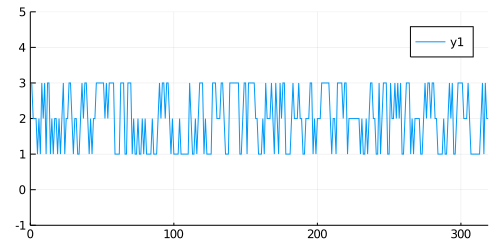

In [8]:
y=readdlm("monsoon_states_mumbai_1.txt", '\t', Int, '\n')
plot(y, xlim = (0,N), ylim = (-1,5), size = (500, 250))

In [9]:
#length of data and no of states 
N = length(y);  
K = 3;

In [3]:
@model BayesHmm(y, K) = begin
    N = length(y)
    s = tzeros(Int, N)
    m = Vector(undef, K)
    T = Vector{Vector}(undef, K)

    for i = 1:K
        T[i] ~ Dirichlet(ones(K)/K)
        m[i] ~ Normal(i, 0.5)
    end

    s[1] ~ Categorical(K)
    y[1] ~ Normal(m[s[1]], 0.1)

    for i = 2:N
        s[i] ~ Categorical(vec(T[s[i-1]]))
        y[i] ~ Normal(m[s[i]], 0.1)
    end
end;

In [10]:
g = Gibbs(HMC(0.001, 7, :m, :T), PG(20, :s))
c = sample(BayesHmm(y, 3), g, 100);

Sampling: 100%|█████████████████████████████████████████| Time: 0:14:09


In [11]:
describe(c)

2-element Array{ChainDataFrame,1}

Summary Statistics
  parameters    mean     std  naive_se     mcse       ess   r_hat
  ──────────  ──────  ──────  ────────  ───────  ────────  ──────
     T[1][1]  0.1570  0.0048    0.0005  missing    4.0517  1.4041
     T[1][2]  0.8086  0.0044    0.0004  missing    5.2174  1.2873
     T[1][3]  0.0344  0.0008    0.0001  missing    3.3472  1.5712
     T[2][1]  0.2484  0.0078    0.0008  missing    2.0887  2.7938
     T[2][2]  0.0513  0.0016    0.0002  missing    4.4945  1.2839
     T[2][3]  0.7003  0.0071    0.0007  missing    2.2720  2.4599
     T[3][1]  0.0899  0.0021    0.0002  missing    2.2828  2.2577
     T[3][2]  0.9099  0.0021    0.0002  missing    2.2809  2.2600
     T[3][3]  0.0001  0.0000    0.0000  missing    2.0408  2.7507
        m[1]  1.1624  0.0773    0.0077  missing    5.9266  1.0625
        m[2]  2.2746  0.0410    0.0041  missing    5.9096  1.0299
        m[3]  2.9759  0.0619    0.0062  missing    6.0250  1.0772
        s[1]  3.0000  

In [ ]:
The transition probabilities between states can help predict the rainfall regime for the next three days. The window for each phase here is chosen three days which may not be ap